In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Es.7 pag.153
Scarica il file neowise.json. Esso contiene dati di asteroidi comete. 
Crea un notebook in cui: 
* creato un dataframe contenente dati; 
* calcolata la media del periodo orbitale (colonna `period_yr`) per ogni categoria di classe orbitale (la colonna `orbit_class`);
* utilizzando metodi grafici dei dataframe, tracciato un grafico dispersione che rappresenti valori della colonna `moid_au` rispetto quelli di `period_yr`.

In [15]:
data_json= pd.read_json("./neowise.json")
dataFrame= pd.DataFrame(data_json)

In [16]:
data.head(5)

,designation,discovery_date,h_mag,moid_au,q_au_1,q_au_2,period_yr,i_deg,pha,orbit_class
0,419880 (2011 AH37),2011-01-07T00:00:00.000,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),2010-09-17T00:00:00.000,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),2010-07-28T00:00:00.000,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),2010-03-06T00:00:00.000,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),2010-07-18T00:00:00.000,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   designation     202 non-null    object 
 1   discovery_date  202 non-null    object 
 2   h_mag           181 non-null    float64
 3   moid_au         202 non-null    float64
 4   q_au_1          202 non-null    float64
 5   q_au_2          200 non-null    float64
 6   period_yr       200 non-null    float64
 7   i_deg           202 non-null    float64
 8   pha             202 non-null    object 
 9   orbit_class     202 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.9+ KB


In [18]:
data["orbit_class"].unique()

array(['Apollo', 'Amor', 'Aten', 'Comet', 'Jupiter-family Comet',
       'Halley-type Comet*', 'Parabolic Comet', 'Jupiter-family Comet*',
       'Encke-type Comet'], dtype=object)

In [19]:
classe_orbitale=['Apollo', 'Amor', 'Aten', 'Comet', 'Jupiter-family Comet','Halley-type Comet*', 'Parabolic Comet', 'Jupiter-family Comet*','Encke-type Comet']

In [24]:
for orbita in classe_orbitale:
    medie_periodoOrbitale=np.mean(data[data["orbit_class"]==orbita]["period_yr"])
    print(orbita, medie_periodoOrbitale)

Apollo 2.9411428571428573
Amor 5.235081967213114
Aten 0.8913333333333333
Comet 238220.62555555554
Jupiter-family Comet 8.38
Halley-type Comet* 23.375
Parabolic Comet nan
Jupiter-family Comet* 17.3
Encke-type Comet 5.49


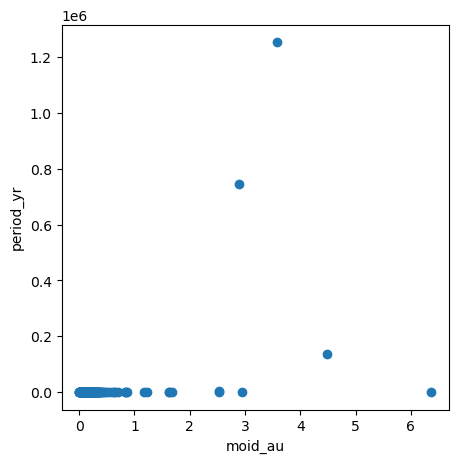

In [28]:
fig, ax= plt.subplots(figsize=(5,5))

ax.scatter(data["moid_au"], data["period_yr"])
ax.set_xlabel("moid_au")
ax.set_ylabel("period_yr")

plt.show()

### Es.9 pag.153
Scarica penguins_size.csv, file che contiene dati dei pinguini dell’arcipelago di Palmer. 
Importali in un dataframe per calcolare: 
* il numero di pinguini femmina tra quelli che hanno peso minore di 3,7 kg;
* il numero di pinguini femmina tra quelli che hanno peso minore di 3,7 kg sono di specie Gentoo;
* la lunghezza media in millimetri della pinna (colonna flipper_length_mm) tra pinguini Adelie;
* la lunghezza media in millimetri della pinna (colonna flipper_length_mm) tra pinguini Adelie maschi;
* il peso del pinguino maschio Adelie più piccolo.

In [29]:
data= pd.read_csv("./penguins_size.csv")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [34]:
selected_data=data.dropna()

In [36]:
selected_data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [41]:
ping_f=selected_data[selected_data["sex"]=="FEMALE"]["body_mass_g"] < 3700
np.count_nonzero(ping_f)

85

In [44]:
ping_f_gentoo = selected_data[
    (selected_data["sex"] == "FEMALE") &
    (selected_data["body_mass_g"] < 3700) &
    (selected_data["species"] == "Gentoo")
]
len(ping_f_gentoo)

0

In [47]:
np.mean(selected_data[selected_data["species"]=="Adelie"]["flipper_length_mm"])

np.float64(190.1027397260274)

In [48]:
np.mean(selected_data[(selected_data["species"]=="Adelie")& (selected_data["sex"]=="MALE")]["flipper_length_mm"])

np.float64(192.41095890410958)

In [49]:
np.min(selected_data[(selected_data["species"]=="Adelie")& (selected_data["sex"]=="MALE")]["body_mass_g"])

3325.0